In [12]:
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [13]:
tf.__version__

'1.14.0'

In [14]:
mnist = keras.datasets.mnist

In [58]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [16]:
x_train[0].shape


(28, 28)

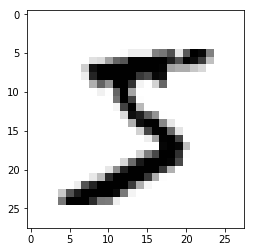

In [17]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [18]:
#print(x_train[0])

In [27]:
X_train = keras.utils.normalize(x_train, axis=1)
X_test = keras.utils.normalize(x_test, axis=1)

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [38]:
input_img = keras.models.Input(shape=(784,))
encoded = keras.layers.Dense(128, activation= tf.nn.relu)(input_img)
encoded = keras.layers.Dense(64, activation= tf.nn.relu)(encoded)
encoded = keras.layers.Dense(32, activation= tf.nn.relu)(encoded)
encoded = keras.layers.Dense(16, activation= tf.nn.relu)(encoded) #the latent layer 
decoded = keras.layers.Dense(64, activation= tf.nn.relu)(encoded)
decoded = keras.layers.Dense(128, activation= tf.nn.relu)(decoded)
decoded = keras.layers.Dense(784, activation= tf.nn.sigmoid)(decoded)

encoder = keras.Model(input_img, encoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.3066 - val_loss: 0.1686
Epoch 2/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.1677 - val_loss: 0.1670
Epoch 3/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1667 - val_loss: 0.1663
Epoch 4/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1662 - val_loss: 0.1659
Epoch 5/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1659 - val_loss: 0.1657
Epoch 6/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1657 - val_loss: 0.1655
Epoch 7/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1656 - val_loss: 0.1655
Epoch 8/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1655 - val_loss: 0.1653
Epoch 9/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1654 - val_loss: 0.1

60000/60000 [==============================] - 3s 50us/step - loss: 0.1321 - val_loss: 0.1321
Epoch 78/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1319 - val_loss: 0.1321
Epoch 79/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1317 - val_loss: 0.1319
Epoch 80/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1316 - val_loss: 0.1319
Epoch 81/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1314 - val_loss: 0.1322
Epoch 82/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1313 - val_loss: 0.1314
Epoch 83/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1312 - val_loss: 0.1315
Epoch 84/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1311 - val_loss: 0.1316
Epoch 85/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1309 - val_loss: 0.1312
Epoch 86/100
60000/60000 [========================

In [33]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_69 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_71 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_72 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_73 (Dense)             (None, 128)               8320      
__________

In [39]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_76 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_77 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_78 (Dense)             (None, 16)                528       
Total params: 111,344
Trainable params: 111,344
Non-trainable params: 0
_________________________________________________________________


In [40]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

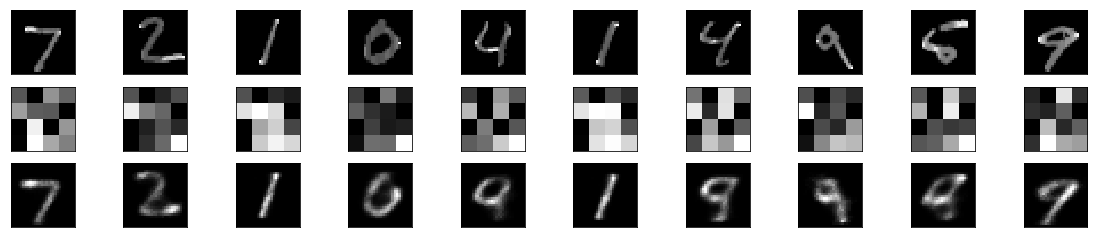

In [42]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(4,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [43]:
autoencoder.save('mnist_autoencoder.model')

In [44]:
encoder.save('mnist_encoder.model')

In [51]:
X = encoder.predict(X_train)

In [62]:
X.shape


(60000, 16)

In [71]:

model = keras.models.Sequential()

model.add(keras.layers.Dense(10,input_dim=16, activation= tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
model.fit(X, y_train, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 3s 50us/step - loss: 1.6846 - acc: 0.5866
Epoch 2/3
60000/60000 [==============================] - 2s 41us/step - loss: 0.6740 - acc: 0.7792
Epoch 3/3
60000/60000 [==============================] - 2s 41us/step - loss: 0.6357 - acc: 0.7928


In [72]:
X_test = encoder.predict(X_test)

In [73]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 40us/step
(0.61582586145401, 0.8076)


In [74]:
predictions = model.predict([X_test])

In [77]:
print(np.argmax(predictions[0]))

7
